# **PERSIAPAN**


*Import Library*

---



In [35]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

*Import Data dalam Format CSV*

In [36]:
# Membaca data CSV
data = pd.read_csv('Emisi.csv')
# Melihat 5 data pertama
print(data.head())

   Ville (L/100 km)  Route (L/100 km)  kombinasi (L/100 km)  Emisi CO2 (g/km)
0               8.1               6.5                   7.4               172
1               8.9               6.5                   7.8               181
2              11.1               8.3                   9.9               230
3              12.6               9.4                  11.2               263
4              13.8              11.2                  12.4               291


Membaca file CSV bernama 'Emisi.csv' menggunakan pustaka pandas dan menampilkan lima baris pertama dari dataset tersebut. Dataset ini berisi informasi mengenai konsumsi bahan bakar kendaraan dalam tiga kondisi berkendara, yaitu di dalam kota (Ville), di jalan raya (Route), dan dalam kondisi gabungan (Kombinasi). Selain itu, dataset ini juga mencatat jumlah emisi karbon dioksida (CO2) yang dihasilkan dalam satuan gram per kilometer (g/km). Output yang ditampilkan mencakup nilai konsumsi bahan bakar dalam satuan liter per 100 km serta jumlah emisi CO2 yang dihasilkan oleh kendaraan.

In [37]:
data.rename(columns={'Ville (L/100 km)': 'X', 'Emisi CO2 (g/km)': 'Y' }, inplace=True)
print(data)

        X  Route (L/100 km)  kombinasi (L/100 km)    Y
0     8.1               6.5                   7.4  172
1     8.9               6.5                   7.8  181
2    11.1               8.3                   9.9  230
3    12.6               9.4                  11.2  263
4    13.8              11.2                  12.4  291
..    ...               ...                   ...  ...
637   9.7               7.5                   8.7  205
638  10.7               8.1                   9.5  223
639  10.1               7.8                   9.1  213
640  10.0               7.8                   9.0  212
641  11.5               9.0                  10.4  244

[642 rows x 4 columns]


Untuk menyederhanakan nama kolom, kolom 'Ville (L/100 km)' diubah menjadi variabel 'X' dan 'Emisi CO2 (g/km)' menjadi variabel 'Y' menggunakan metode data.rename() . Perubahan ini dilakukan langsung pada dataset dengan menetapkan inplace_true(), sehingga tidak perlu membuat variabel baru. Setelah perubahan ini, dataset memiliki nama kolom yang lebih ringkas, yang dapat mempermudah proses analisis dan manipulasi data lebih lanjut.

---
# **ANALISIS**

*Menghitung Matriks Korelasi*

In [38]:
# Menghitung matriks korelasi
correlation_matrix = data.corr()
print(correlation_matrix)

                             X  Route (L/100 km)  kombinasi (L/100 km)  \
X                     1.000000          0.909671              0.986990   
Route (L/100 km)      0.909671          1.000000              0.961539   
kombinasi (L/100 km)  0.986990          0.961539              1.000000   
Y                     0.975617          0.951061              0.988786   

                             Y  
X                     0.975617  
Route (L/100 km)      0.951061  
kombinasi (L/100 km)  0.988786  
Y                     1.000000  


Matriks korelasi dari dataset ini diperoleh menggunakan data.corr(), yang menggambarkan hubungan linear antara variabel-variabel dalam dataset. Nilai korelasi berada dalam rentang -1 hingga 1, di mana nilai mendekati 1 menunjukkan korelasi positif yang kuat, sedangkan nilai mendekati -1 menunjukkan korelasi negatif yang kuat. Berdasarkan output yang dihasilkan, variabel X (konsumsi bahan bakar di dalam kota), Route (konsumsi di jalan raya), dan Kombinasi memiliki korelasi yang tinggi dengan Y (Emisi CO2). Hal ini menunjukkan bahwa semakin tinggi konsumsi bahan bakar, semakin besar pula emisi CO2 yang dihasilkan.

*Membuat Matriks Korelasi*

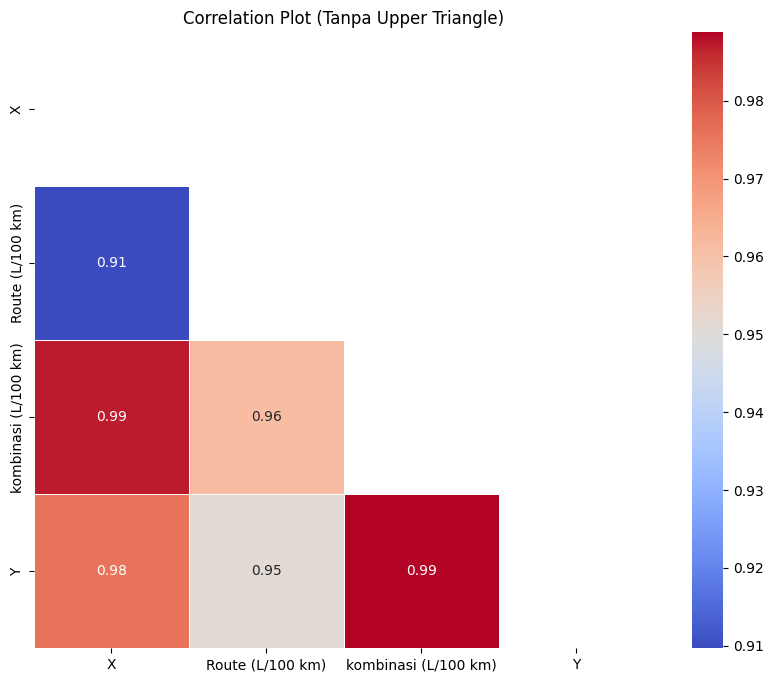

In [39]:
# Membuat mask untuk upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Membuat heatmap tanpa upper triangle
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Plot (Tanpa Upper Triangle)')
plt.show()

Dapat kita lihat bahwa kode tersebut menampilkan heatmap untuk memvisualisasikan korelasi antar variabel dalam dataset. Namun, untuk meningkatkan keterbacaan, hanya bagian lower triangle dari matriks korelasi yang ditampilkan dengan menggunakan mask. Pendekatan ini membantu menghindari redundansi informasi karena matriks korelasi bersifat simetris, sehingga setiap pasangan variabel hanya ditampilkan sekali.

*Membuat Model Regresi Sederhana*





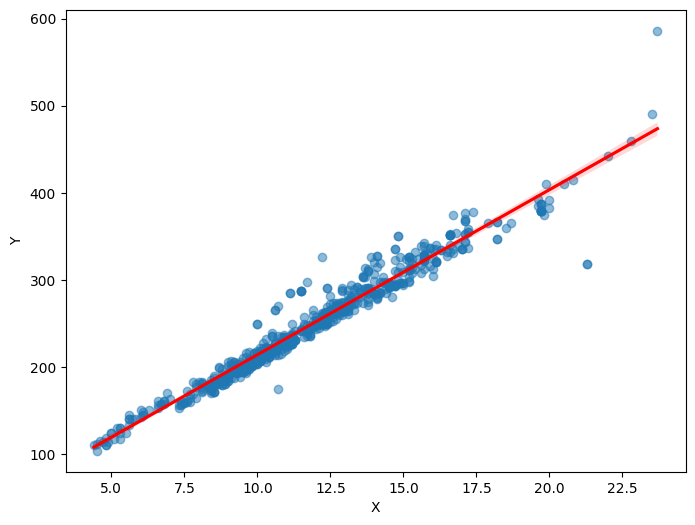

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.regplot(x="X", y="Y", data=data,
            scatter_kws={"alpha": 0.5},
            line_kws={"color": "red"})  # Ubah warna garis regresi menjadi merah
plt.show()


Dengan menetapkan x = "X" dan y = "Y", plot yang dihasilkan menunjukkan hubungan antara konsumsi bahan bakar di kota (X) dan emisi CO2 (Y). Garis regresi secara otomatis ditambahkan untuk menggambarkan tren hubungan linear antara kedua variabel. Dari plot ini, terlihat bahwa X dan Y memiliki korelasi positif yang kuat, di mana semakin tinggi konsumsi bahan bakar di kota, semakin tinggi pula emisi CO2 yang dihasilkan.

*Membuat Model Regresi Sederhana* #2

In [66]:
from sklearn.linear_model import LinearRegression

# Pisahkan variabel independen (X) dan dependen (Y)
X = data[["X"]]  # Perlu diubah ke bentuk 2D
Y = data["Y"]


# Menambahkan konstanta ke model (intercept)
X = sm.add_constant(X)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [47]:
import pandas as pd
import statsmodels.api as sm

# Menambahkan konstanta ke dalam X agar ada intercept
X = sm.add_constant(X)

# Membuat model regresi linear
model = sm.OLS(Y, X).fit()

# Mendapatkan ringkasan model
summary = model.summary()

# Menampilkan hasil dalam format yang lebih rapi
print(summary)  # Jika ingin output langsung seperti biasanya

# Jika ingin menyimpannya ke dalam DataFrame pandas
tables = summary.tables[1]  # Tabel koefisien regresi
df = pd.DataFrame(tables.data[1:], columns=tables.data[0])

# Menyesuaikan nama kolom agar lebih rapi
df.columns = ["Variable", "Coef", "Std Err", "t", "P>|t|", "[0.025", "0.975]"]

# Menampilkan tabel yang lebih bersih
print(df.to_string(index=False))


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                 1.265e+04
Date:                Thu, 06 Mar 2025   Prob (F-statistic):               0.00
Time:                        14:45:11   Log-Likelihood:                -2618.3
No. Observations:                 642   AIC:                             5241.
Df Residuals:                     640   BIC:                             5250.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.7691      2.096     11.815      0.0

Output dari kode tersebut menampilkan regresi linear sederhana menggunakan metode Ordinary Least Squares (OLS) dari pustaka statsmodels untuk memodelkan hubungan antara konsumsi bahan bakar di kota (X) dan emisi CO2 (Y). Hasil regresi menunjukkan bahwa X memiliki korelasi positif yang kuat dengan Y, yang berarti semakin tinggi konsumsi bahan bakar di kota, semakin tinggi pula emisi CO2 yang dihasilkan. Dengan korelasi yang tinggi, model ini dapat digunakan sebagai pendekatan yang cukup baik untuk melakukan prediksi emisi CO2 berdasarkan konsumsi bahan bakar di kota.

In [54]:
print(model)
prediksi = model.predict(X)
prediksi

,0
0,178.168794
1,193.319386
2,234.983513
3,263.390873
4,286.116761
...,...
637,208.469978
638,227.408218
639,216.045274
640,214.151450


"Baris pertama dari output regresi (178.168794) menunjukkan bahwa ketika konsumsi bahan bakar di kota (X) bernilai 8.1, model memperkirakan emisi CO2 sekitar 178.17 g/km (setelah pembulatan). Sesuai dengan hubungan positif antara X dan Y, prediksi emisi CO2 meningkat seiring bertambahnya konsumsi bahan bakar. Hasil ini mengindikasikan bahwa model regresi dapat digunakan untuk memperkirakan emisi kendaraan berdasarkan konsumsi bahan bakarnya dengan tingkat akurasi yang cukup baik."

*Visualisasi Hasil Prediksi*

In [55]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, Y)

LinearRegression()

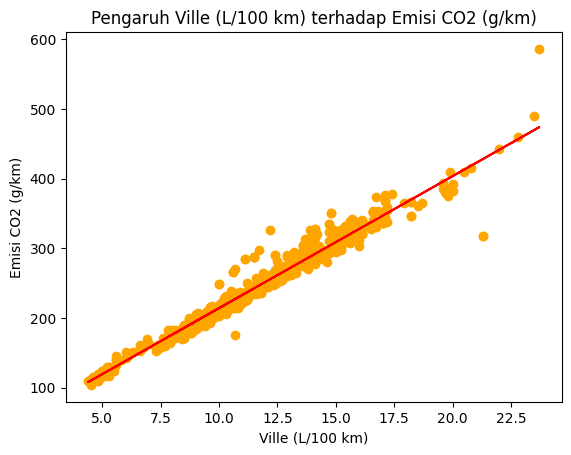

In [58]:
plt.scatter(X.X, Y, color = 'orange')
plt.plot(X.X, lin_reg.predict(X), color = 'red')
plt.title('Pengaruh Ville (L/100 km) terhadap Emisi CO2 (g/km)')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

Kode ini menghasilkan visualisasi regresi linear antara konsumsi bahan bakar di kota (X) dan emisi CO2 (Y). Dalam plot tersebut, titik merah mewakili data asli dari dataset dalam bentuk scatter plot, sementara garis biru menunjukkan model regresi linear yang menggambarkan hubungan antara X dan Y. Pola garis biru yang mengikuti distribusi titik merah menegaskan bahwa konsumsi bahan bakar yang lebih tinggi cenderung meningkatkan emisi CO2, sejalan dengan hasil regresi sebelumnya yang menunjukkan korelasi positif antara kedua variabel.

---

# Evaluasi

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluasi model
mse = mean_squared_error(Y, prediksi)
mae = mean_absolute_error(Y, prediksi)
r2 = r2_score(Y, prediksi)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 204.1479
Mean Absolute Error (MAE): 9.0293
R-squared (R²): 0.9518


Setelah mengevaluasi model regresi linear menggunakan metrik Mean Squared Error (MSE), Mean Absolute Error (MAE), dan koefisien determinasi (R²), diperoleh hasil bahwa rata-rata selisih antara nilai prediksi dan aktual sekitar 9 g/km CO₂ berdasarkan MAE. Meskipun masih terdapat error, nilainya relatif kecil dibandingkan skala data, yang menunjukkan bahwa model memiliki performa yang cukup baik. Selain itu, nilai R² mencapai sekitar 95%, yang mengindikasikan bahwa model mampu menjelaskan sebagian besar variasi dalam data dan memiliki tingkat akurasi yang cukup tinggi.

---

# Membuat Model-Model Regresi Polynomial

In [63]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, Y)

LinearRegression()

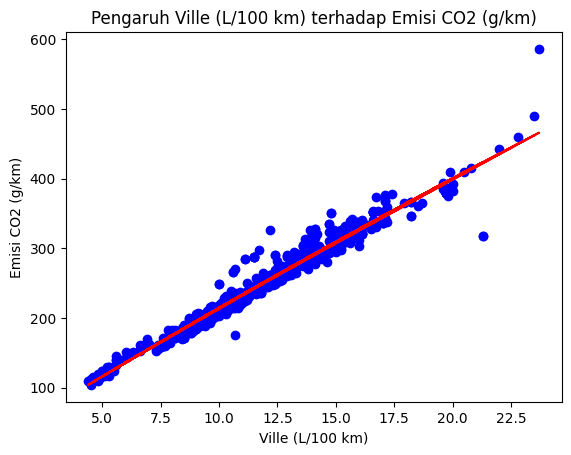

In [65]:
plt.scatter(X.X, Y, color = 'blue')
plt.plot(X.X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'red')
plt.title('Pengaruh Ville (L/100 km) terhadap Emisi CO2 (g/km)')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

Kode ini menghasilkan visualisasi regresi polinomial untuk menganalisis hubungan antara konsumsi bahan bakar di kota (X) dan emisi CO₂ (Y). Dalam plot tersebut, titik merah merepresentasikan data asli dari dataset dalam bentuk scatter plot, sementara garis biru menunjukkan hasil regresi polinomial. Berbeda dengan regresi linear, regresi polinomial lebih fleksibel dalam menangkap pola hubungan yang mungkin tidak sepenuhnya linear, sehingga dapat memberikan representasi yang lebih akurat terhadap data.

In [ ]:
Y_poly = lin_reg_2.predict(X_poly)
Y_poly

array([177.55649707, 193.16562068, 235.63198483, 264.20057737,
       286.83025876, 233.71629137, 239.45920152, 239.45920152,
       258.51188027, 214.48290248, 224.1169729 , 229.88073422,
       239.45920152, 325.95053915, 322.25120965, 314.8358697 ,
       206.75062473, 216.41249672, 220.26751497, 216.41249672,
       224.1169729 , 216.41249672, 214.48290248, 231.79920784,
       231.79920784, 231.79920784, 264.20057737, 227.96087052,
       247.09695396, 216.41249672, 226.03961675, 226.03961675,
       252.81067247, 271.76604575, 249.00291687, 269.87676378,
       277.42555122, 346.19746086, 346.19746086, 346.19746086,
       329.64430835, 222.19293897, 233.71629137, 233.71629137,
       258.51188027, 249.00291687, 260.40950272, 260.40950272,
       327.79811879, 264.20057737, 264.20057737, 327.79811879,
       329.64430835, 348.02974964, 348.02974964, 204.8140801 ,
       193.16562068, 206.75062473, 189.27168024, 189.27168024,
       277.42555122, 312.97855952, 298.07003524, 303.67

"Hasil output ini menampilkan array prediksi nilai Y berdasarkan model regresi polinomial yang telah dibuat. `Y_poly` merupakan array yang berisi nilai-nilai estimasi untuk variabel dependen (Emisi CO₂) yang dihitung menggunakan model regresi polinomial. Nilai-nilai dalam array ini diperoleh setelah variabel independen X mengalami transformasi polinomial dan diproses oleh model untuk menghasilkan prediksi. Dengan pendekatan polinomial, model dapat menangkap pola hubungan yang lebih kompleks antara konsumsi bahan bakar dan emisi CO₂ dibandingkan dengan regresi linear."

In [ ]:
# Evaluasi model
mse_poly = mean_squared_error(Y, Y_poly)
mae_poly = mean_absolute_error(Y, Y_poly)
r2_poly = r2_score(Y, Y_poly)

# Cetak hasil evaluasi
print(f"Mean Squared Error (MSE Poly): {mse_poly:.4f}")
print(f"Mean Absolute Error (MAE Poly): {mae_poly:.4f}")
print(f"R-squared (R² Poly): {r2_poly:.4f}")

Mean Squared Error (MSE Poly): 202.7943
Mean Absolute Error (MAE Poly): 9.0976
R-squared (R² Poly): 0.9521


Setelah mengevaluasi model regresi polinomial menggunakan metrik Mean Squared Error (MSE), Mean Absolute Error (MAE), dan koefisien determinasi (R²), diperoleh hasil bahwa rata-rata selisih antara nilai prediksi dan aktual sekitar 9 g/km CO₂ berdasarkan MAE. Meskipun masih terdapat error, nilainya relatif kecil dibandingkan dengan skala data, menunjukkan bahwa model memiliki performa yang cukup baik. Selain itu, nilai R² mencapai sekitar 95%, yang menandakan bahwa model regresi polinomial mampu menjelaskan sebagian besar variasi dalam data dengan tingkat akurasi yang tinggi, serupa dengan regresi linear sebelumnya.